<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine2/blob/main/Tinnitus_Only_Gap_Normalized_2023_05_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/Tinnitus/Tinnitus_ALR_EEG_2023.04.21_OnlyGap_No_n0p1p3.csv")
 
dataset=pd.read_csv("/content/drive/MyDrive/Iqram_Sir/Tinnitus_ALR_EEG_2023.04.21_OnlyGap_No_n0p1p3.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 0]))))
result = {}

In [3]:
set(list(dataset['SubjectTypeClass']))

{'Control', 'Tinnitus'}

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 0]=encoder.fit_transform(dataset.iloc[:, 0])

<ipython-input-4-a1565ed65f65>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, 0]=encoder.fit_transform(dataset.iloc[:, 0])


In [5]:
set(list(dataset['SubjectTypeClass']))

{0, 1}

In [63]:
X = dataset.iloc[:,4:]
y = dataset.iloc[:, 0]
col=list(dataset.iloc[0:0,4:])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#Feature Selection

# **Filter Method**

You can remove it. I added for not to input all the features for every runtime

In [64]:
from sklearn.feature_selection import SelectKBest
bestfeatures_1 = SelectKBest(k=10)
fit = bestfeatures_1.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(col)
featureScores1 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores1.columns = ['Specs','Score']

In [ ]:
number_of_feat=int(input("Number Of Best Features: "))

Number Of Best Features: 5


In [ ]:
imp=featureScores1.nlargest(number_of_feat,'Score')
print(imp)

                           Specs      Score
35            p2n2_gap_diff_50ms  30.079152
32          p2_gap_peak_amp_50ms  29.613672
15  gap_auc_n1p2n2_by_total_20ms  19.642362
46  gap_auc_n1p2n2_by_total_50ms  16.693626
4             p2n2_gap_diff_20ms  15.306250


In [ ]:
list_of_feat1=[]

for i in range(number_of_feat):
  list_of_feat1.append(imp.iloc[:,0:].values[i][0])

# **Manual Features**

In [ ]:
list_of_feat2=[
     
'p2n2_gap_diff_50ms',
'p2_gap_peak_amp_50ms',
'p2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1_gap_peak_amp_50ms',
'n2_gap_peak_amp_20ms',
'n1p2_gap_no_gap_ratio_age-norm_20ms',
'n1p2_gap_diff_50ms',
'gamma_freq_20ms',
'total_auc_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_n1p2_UP_50ms',
'gap_auc_n1p2_LO_50ms',
'n1p2_gap_diff_20ms',
'gap_auc_p2n2_UP_50ms',
'ABR_peak_auc_50ms'

    ]

print(len(list_of_feat2))

16


In [11]:
list_of_feat3=[   
'p2_gap_peak_amp_50ms',
'p2n2_gap_diff_20ms',
'p2n2_gap_diff_50ms',
'n2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1p2_gap_no_gap_ratio_age-norm_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_p2n2_UP_50ms',
'gap_auc_n1p2n2_20ms',
'n1p2_gap_diff_50ms',
'gap_auc_total_abs_20ms',
'n1p2_gap_no_gap_ratio_age-norm_20ms',
'alpha_peak_auc_50ms',
'gamma_freq_50ms',
'ABR_peak_auc_50ms'
    ]

print(len(list_of_feat3))

16


In [61]:
list_of_feat = list_of_feat3

X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 0]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_new)
X_new = scaler.transform(X_new)

## Data Partition

In [ ]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)
'''

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)\n'

In [13]:
X_train=pd.DataFrame(X_new).iloc[:136,:]  
X_test=pd.DataFrame(X_new).iloc[136:,:]
y_train=y_new.iloc[:136]
y_test=y_new.iloc[136:]

In [14]:
X_train

,p2_gap_peak_amp_50ms,p2n2_gap_diff_20ms,p2n2_gap_diff_50ms,n2_gap_peak_amp_20ms,gap_auc_n1p2n2_by_total_20ms,gap_auc_n1p2n2_by_total_50ms,n1p2_gap_no_gap_ratio_age-norm_50ms,gap_auc_p2n2_UP_20ms,gap_auc_p2n2_UP_50ms,gap_auc_n1p2n2_20ms,n1p2_gap_diff_50ms,gap_auc_total_abs_20ms,n1p2_gap_no_gap_ratio_age-norm_20ms,alpha_peak_auc_50ms,gamma_freq_50ms,ABR_peak_auc_50ms
0,5.881574,10.717372,11.729882,-4.881017,0.517921,0.526269,0.819487,447.421938,416.318780,668.183633,8.330211,1290.125535,0.621010,2.009818,33.935547,2.265867
1,5.572664,7.401337,10.387166,-3.249578,0.522289,0.458027,1.191124,457.474639,551.493315,819.025985,9.706766,1568.148395,0.817921,1.106065,33.447266,1.392070
2,5.536889,10.977889,6.612765,-5.371053,0.504730,0.527167,0.886145,524.950227,318.865082,1017.346131,5.800657,2015.624120,2.146239,1.803541,34.667969,3.744687
3,0.483852,4.649785,3.682787,-0.249103,0.441254,0.632704,0.488293,219.446930,320.533199,260.514342,1.350778,590.395208,0.720855,0.771864,36.376953,2.308262
4,3.314479,5.368919,6.843491,-0.890925,0.454994,0.614187,0.599727,249.006900,137.669239,296.638479,2.458360,651.960984,0.519970,1.453007,33.935547,2.868045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,3.811787,5.547980,6.249105,-3.714481,0.604115,0.532088,0.843784,357.160208,297.217566,601.942490,5.241721,996.404226,0.942861,1.217075,32.226562,2.345013
132,-0.946295,8.325469,4.182791,-4.139455,0.604968,0.482717,0.199796,385.344784,223.507973,751.925668,1.962141,1242.918403,0.771753,1.863205,34.179688,3.069905
133,-4.359852,0.565990,1.660061,-0.267335,0.191658,0.308863,1.222656,52.562846,112.343514,109.030860,2.469130,568.881340,0.831592,2.154649,37.597656,2.813439
134,2.954134,7.995180,7.101645,-4.081790,0.586236,0.671793,0.547476,419.604016,381.241297,642.340930,2.767091,1095.704483,0.986032,1.158375,35.888672,2.214391


In [15]:
X_test

,p2_gap_peak_amp_50ms,p2n2_gap_diff_20ms,p2n2_gap_diff_50ms,n2_gap_peak_amp_20ms,gap_auc_n1p2n2_by_total_20ms,gap_auc_n1p2n2_by_total_50ms,n1p2_gap_no_gap_ratio_age-norm_50ms,gap_auc_p2n2_UP_20ms,gap_auc_p2n2_UP_50ms,gap_auc_n1p2n2_20ms,n1p2_gap_diff_50ms,gap_auc_total_abs_20ms,n1p2_gap_no_gap_ratio_age-norm_20ms,alpha_peak_auc_50ms,gamma_freq_50ms,ABR_peak_auc_50ms
136,2.200802,7.318907,8.113459,-2.445790,0.579474,0.716823,1.078627,310.411894,336.375159,658.536217,5.897585,1136.436947,1.014482,1.226877,32.714844,2.096750
137,7.691056,8.812392,10.749558,-1.241461,0.582232,0.615501,1.135172,322.709464,459.042544,714.147564,7.689530,1226.567825,1.354654,1.491580,33.203125,1.858539
138,7.733831,14.980991,10.193252,-8.229249,0.499426,0.427459,0.827411,611.573755,312.136781,867.485820,10.560899,1736.965907,0.790398,1.976272,34.667969,2.069074
139,3.380816,10.765082,9.233869,-3.580666,0.611435,0.701930,0.545809,621.756271,707.194933,870.548343,3.394359,1423.779439,1.429840,2.204368,35.644531,2.909131
140,5.386204,5.899475,9.697793,-2.361272,0.617587,0.548687,2.001296,452.773273,495.818975,686.380531,8.000707,1111.390397,0.776447,0.721116,33.691406,1.037278
141,0.777124,7.445812,5.571749,-2.247719,0.525812,0.444344,0.709916,423.375537,227.268665,744.909231,4.024843,1416.684027,1.153416,1.274802,38.085938,1.842984
142,2.666303,5.726018,5.757133,-2.593488,0.584453,0.581494,1.566038,401.380815,493.568059,597.878099,5.396761,1022.970165,1.308876,1.212637,32.714844,3.157808
143,3.511367,6.431010,5.809054,-3.718574,0.435309,0.427409,0.914887,315.601310,358.458334,559.104003,5.769796,1284.384136,0.702803,0.914382,32.470703,3.521708
144,5.197150,8.923066,9.429368,-5.207142,0.508176,0.498320,1.069205,344.959873,326.796984,590.673295,8.843393,1162.339576,1.334647,0.896689,32.714844,1.305909
145,4.808859,6.890713,6.956523,-3.609130,0.563641,0.559713,1.209413,266.471941,232.834136,555.614652,7.666325,985.759490,1.029515,1.184378,34.667969,1.806423


###ANOVA with f classifciation

In [ ]:


from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])
selection_method = "ANOVA"

#ADABOOST

In [16]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[9 3]
 [7 4]]
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.57      0.36      0.44        11

    accuracy                           0.57        23
   macro avg       0.57      0.56      0.54        23
weighted avg       0.57      0.57      0.55        23

Accurecy:  0.5652173913043478


1/200 round completed......................... Accurecy: 0.6956521739130435
2/200 round completed......................... Accurecy: 0.6521739130434783
3/200 round completed......................... Accurecy: 0.6086956521739131
4/200 round completed......................... Accurecy: 0.6086956521739131
5/200 round completed......................... Accurecy: 0.6521739130434783
6/200 round completed......................... Accurecy: 0.6956521739130435
7/200 round completed......................... Accurecy: 0.6521739130434783
8/200 round completed......................... Accurecy: 0.6521739130434783
9/200 round completed......................... Accurecy: 0.6521739130434783
10/200 round completed......................... Accurecy: 0.6521739130434783
11/200 round completed......................... Accurecy: 0.6521739130434783
12/200 round completed......................... Accurecy: 0.6521739130434783
13/200 round completed......................... Accurecy: 0.6086956521739131
14/200 r

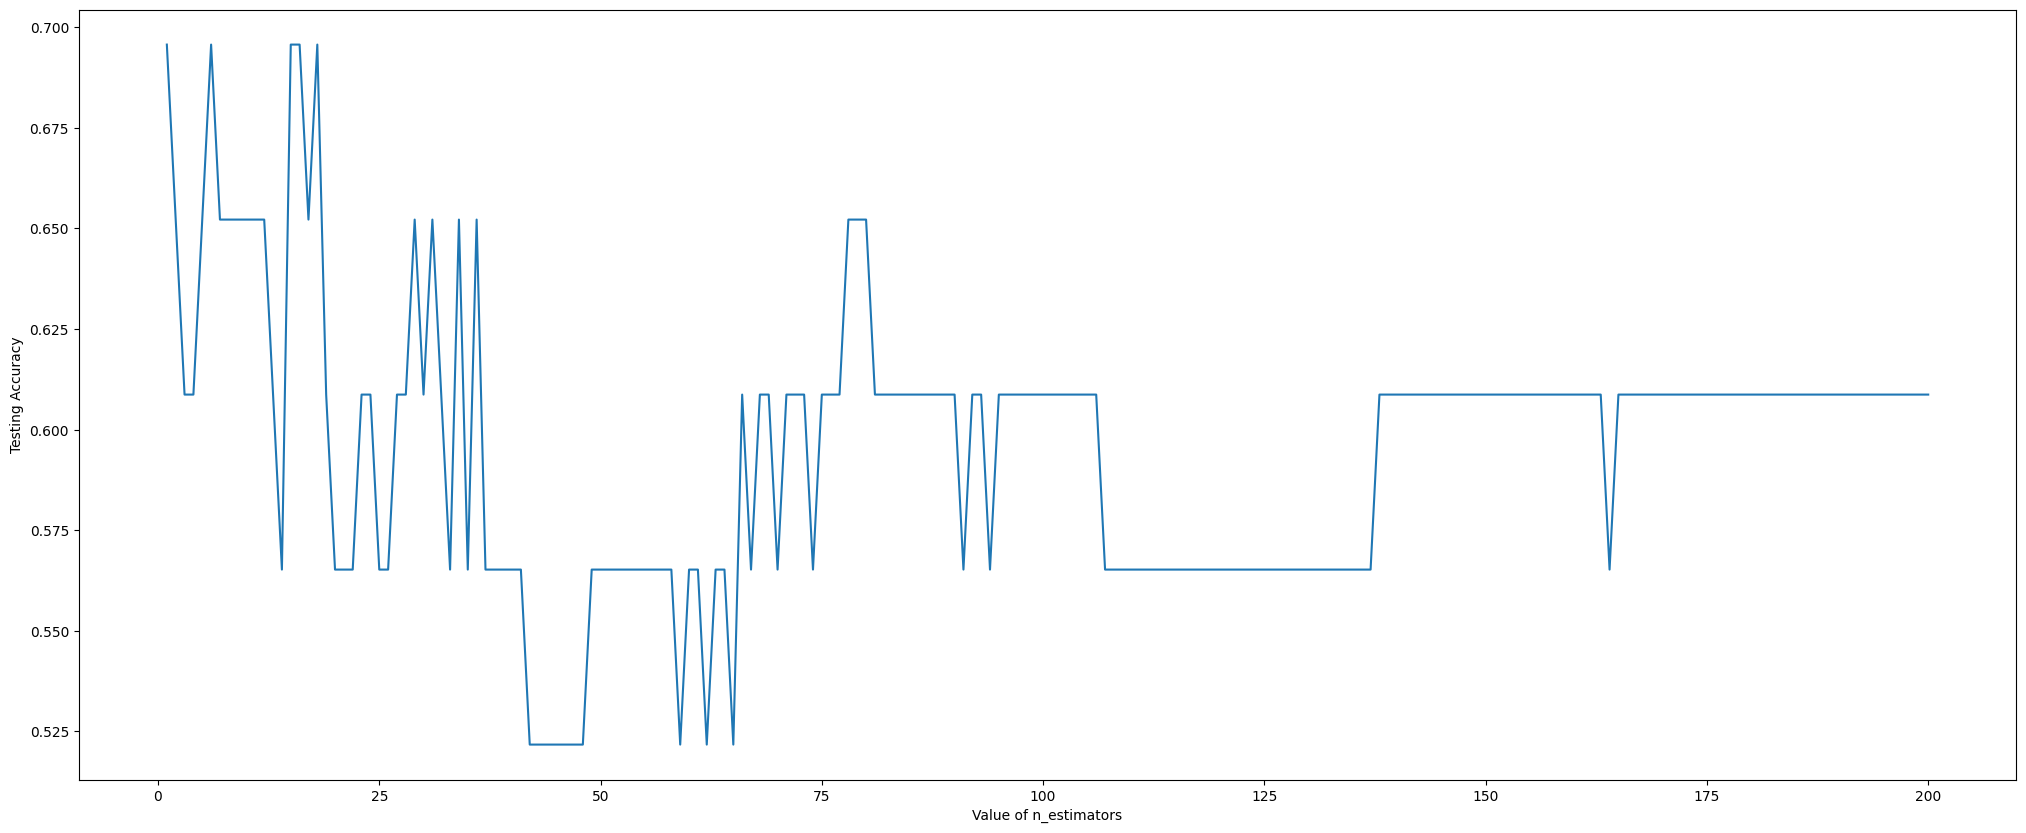

In [17]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[8 4]
 [3 8]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.67      0.73      0.70        11

    accuracy                           0.70        23
   macro avg       0.70      0.70      0.70        23
weighted avg       0.70      0.70      0.70        23

Accurecy:  0.6956521739130435




---



---



#Graddient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[7 5]
 [4 7]]
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.58      0.64      0.61        11

    accuracy                           0.61        23
   macro avg       0.61      0.61      0.61        23
weighted avg       0.61      0.61      0.61        23

Accurecy:  0.6086956521739131


1/150 round completed......................... Accurecy: 0.5652173913043478
2/150 round completed......................... Accurecy: 0.6086956521739131
3/150 round completed......................... Accurecy: 0.5217391304347826
4/150 round completed......................... Accurecy: 0.5652173913043478
5/150 round completed......................... Accurecy: 0.6086956521739131
6/150 round completed......................... Accurecy: 0.6086956521739131
7/150 round completed......................... Accurecy: 0.6086956521739131
8/150 round completed......................... Accurecy: 0.6086956521739131
9/150 round completed......................... Accurecy: 0.6086956521739131
10/150 round completed......................... Accurecy: 0.6086956521739131
11/150 round completed......................... Accurecy: 0.6086956521739131
12/150 round completed......................... Accurecy: 0.6086956521739131
13/150 round completed......................... Accurecy: 0.6086956521739131
14/150 r

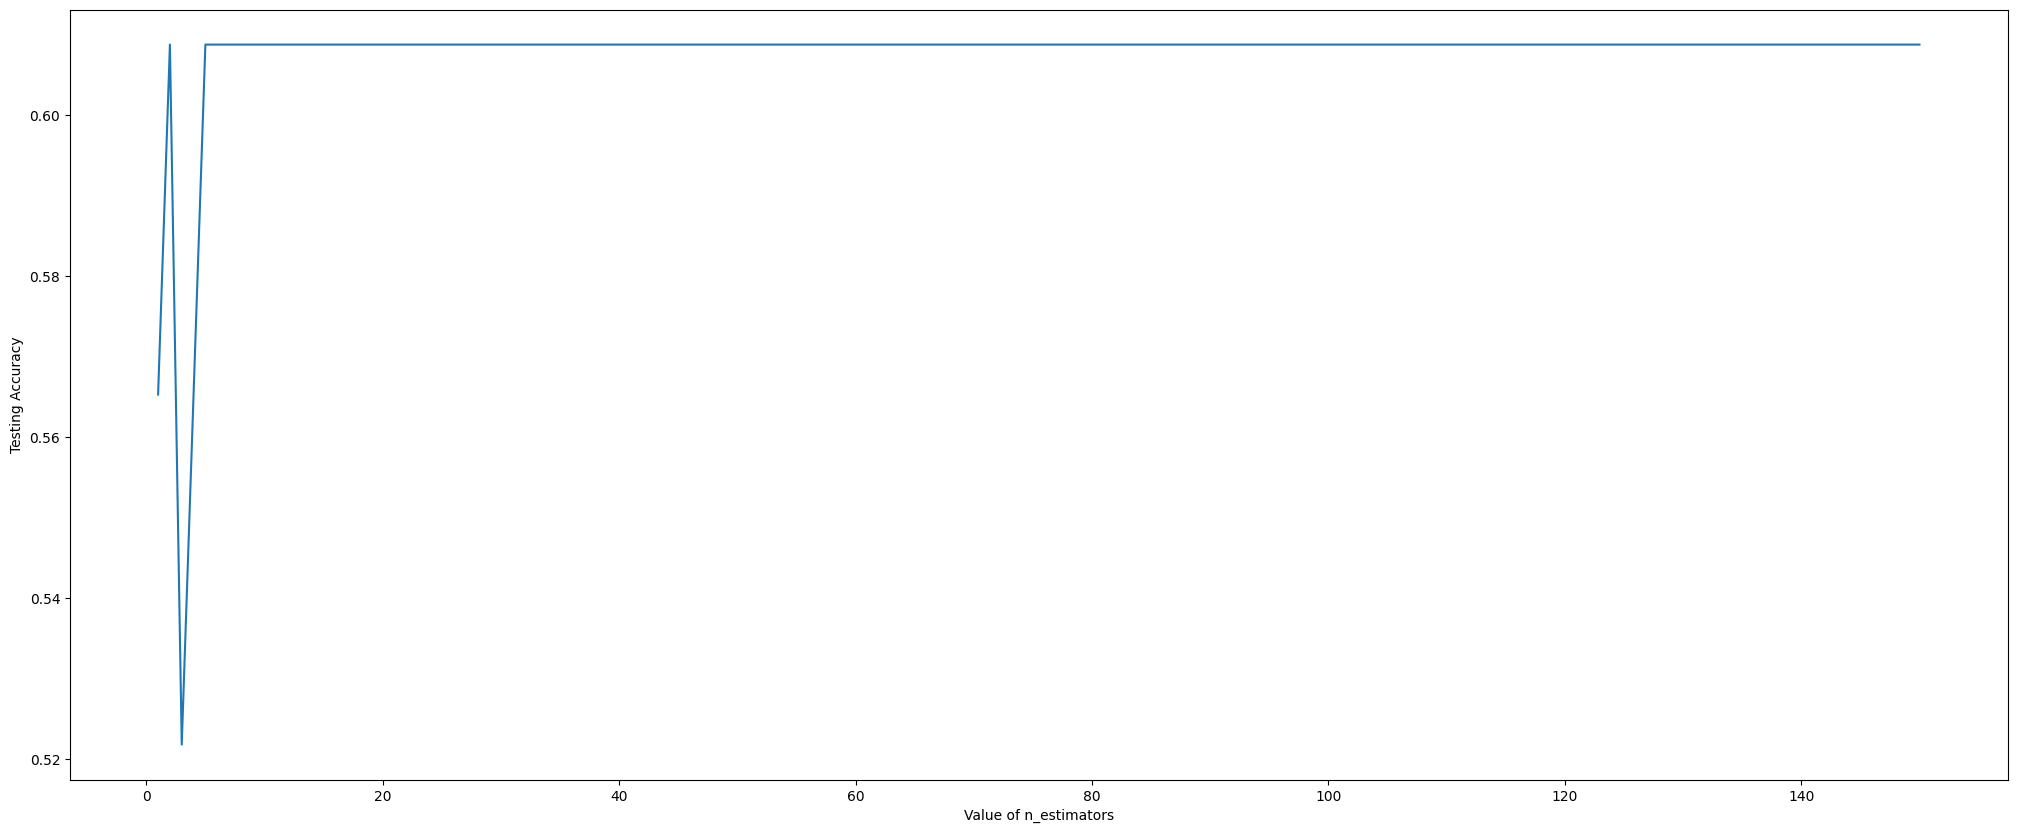

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.6086956521739131
2/30 round completed......................... Accurecy: 0.6521739130434783
3/30 round completed......................... Accurecy: 0.6086956521739131
4/30 round completed......................... Accurecy: 0.6086956521739131
5/30 round completed......................... Accurecy: 0.6086956521739131
6/30 round completed......................... Accurecy: 0.6086956521739131
7/30 round completed......................... Accurecy: 0.6086956521739131
8/30 round completed......................... Accurecy: 0.6086956521739131
9/30 round completed......................... Accurecy: 0.6086956521739131
10/30 round completed......................... Accurecy: 0.6086956521739131
11/30 round completed......................... Accurecy: 0.6086956521739131
12/30 round completed......................... Accurecy: 0.6086956521739131
13/30 round completed......................... Accurecy: 0.6086956521739131
14/30 round completed

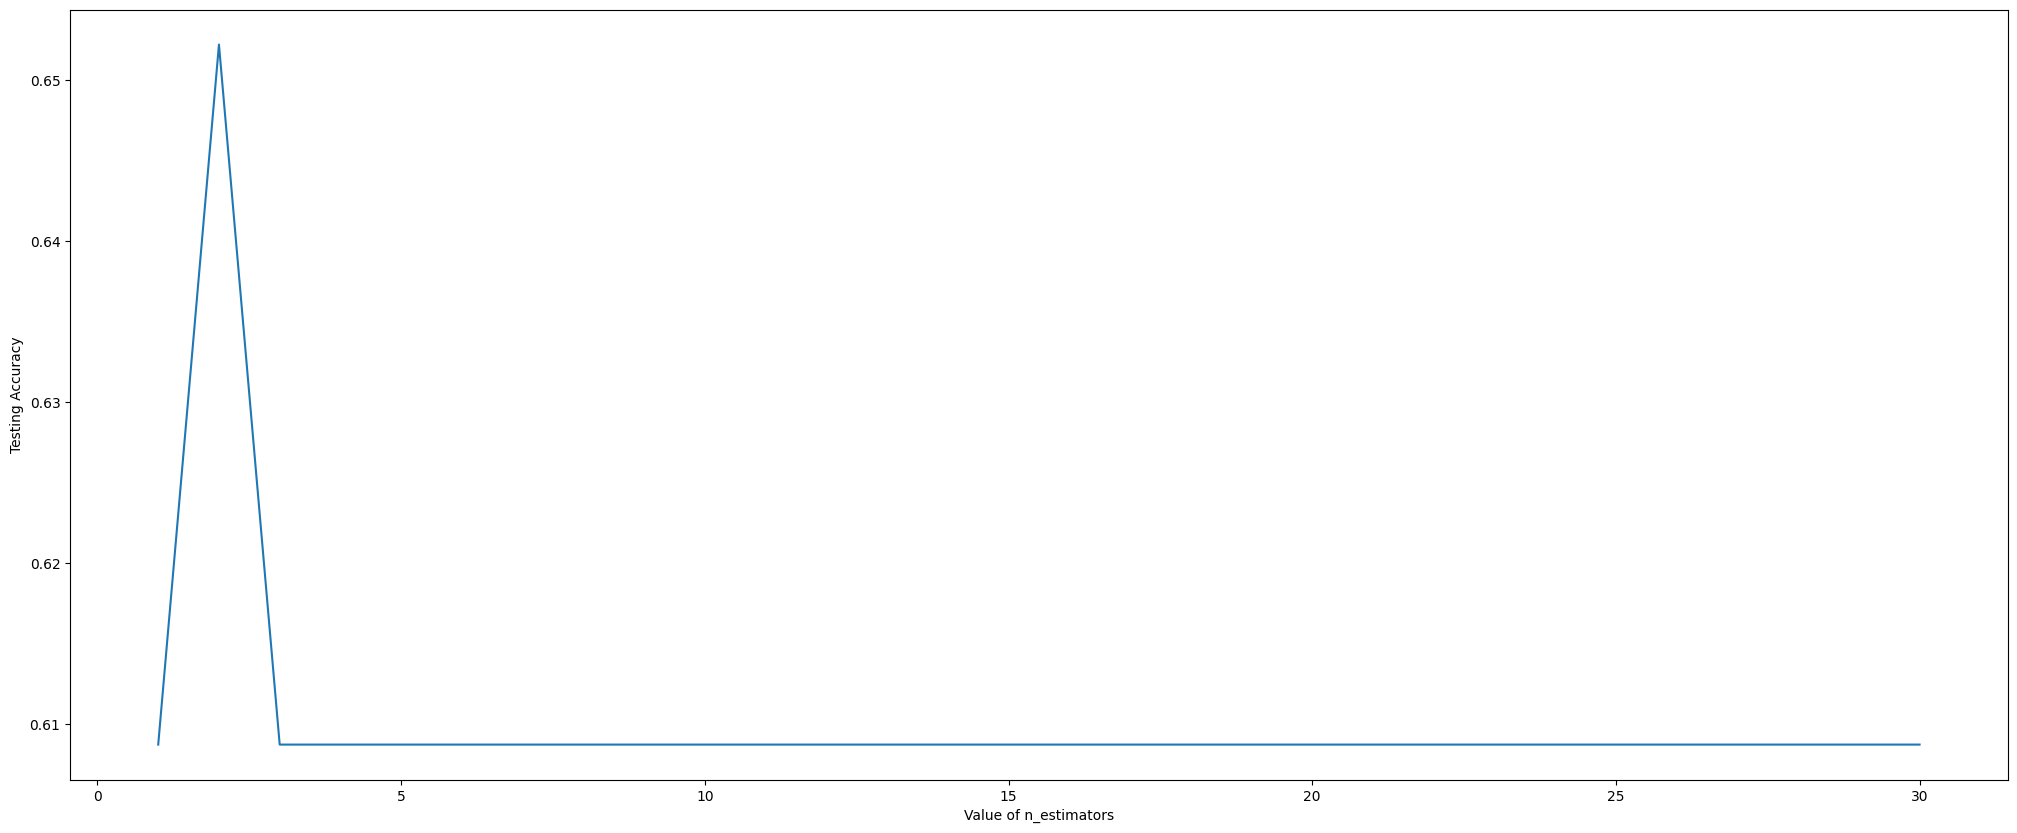

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[8 4]
 [5 6]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.60      0.55      0.57        11

    accuracy                           0.61        23
   macro avg       0.61      0.61      0.61        23
weighted avg       0.61      0.61      0.61        23

Accurecy:  0.6086956521739131


In [23]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[8 4]
 [4 7]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.64      0.64      0.64        11

    accuracy                           0.65        23
   macro avg       0.65      0.65      0.65        23
weighted avg       0.65      0.65      0.65        23

Accurecy:  0.6521739130434783


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[9 3]
 [6 5]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.62      0.45      0.53        11

    accuracy                           0.61        23
   macro avg       0.61      0.60      0.60        23
weighted avg       0.61      0.61      0.60        23

Accurecy:  0.6086956521739131




---



---



#Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[7 5]
 [5 6]]
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.55      0.55      0.55        11

    accuracy                           0.57        23
   macro avg       0.56      0.56      0.56        23
weighted avg       0.57      0.57      0.57        23

Accurecy:  0.5652173913043478


1/150 round completed......................... Accurecy: 0.4782608695652174
2/150 round completed......................... Accurecy: 0.391304347826087
3/150 round completed......................... Accurecy: 0.4782608695652174
4/150 round completed......................... Accurecy: 0.6086956521739131
5/150 round completed......................... Accurecy: 0.6956521739130435
6/150 round completed......................... Accurecy: 0.6521739130434783
7/150 round completed......................... Accurecy: 0.5652173913043478
8/150 round completed......................... Accurecy: 0.5652173913043478
9/150 round completed......................... Accurecy: 0.6521739130434783
10/150 round completed......................... Accurecy: 0.6521739130434783
11/150 round completed......................... Accurecy: 0.6521739130434783
12/150 round completed......................... Accurecy: 0.5652173913043478
13/150 round completed......................... Accurecy: 0.6521739130434783
14/150 ro

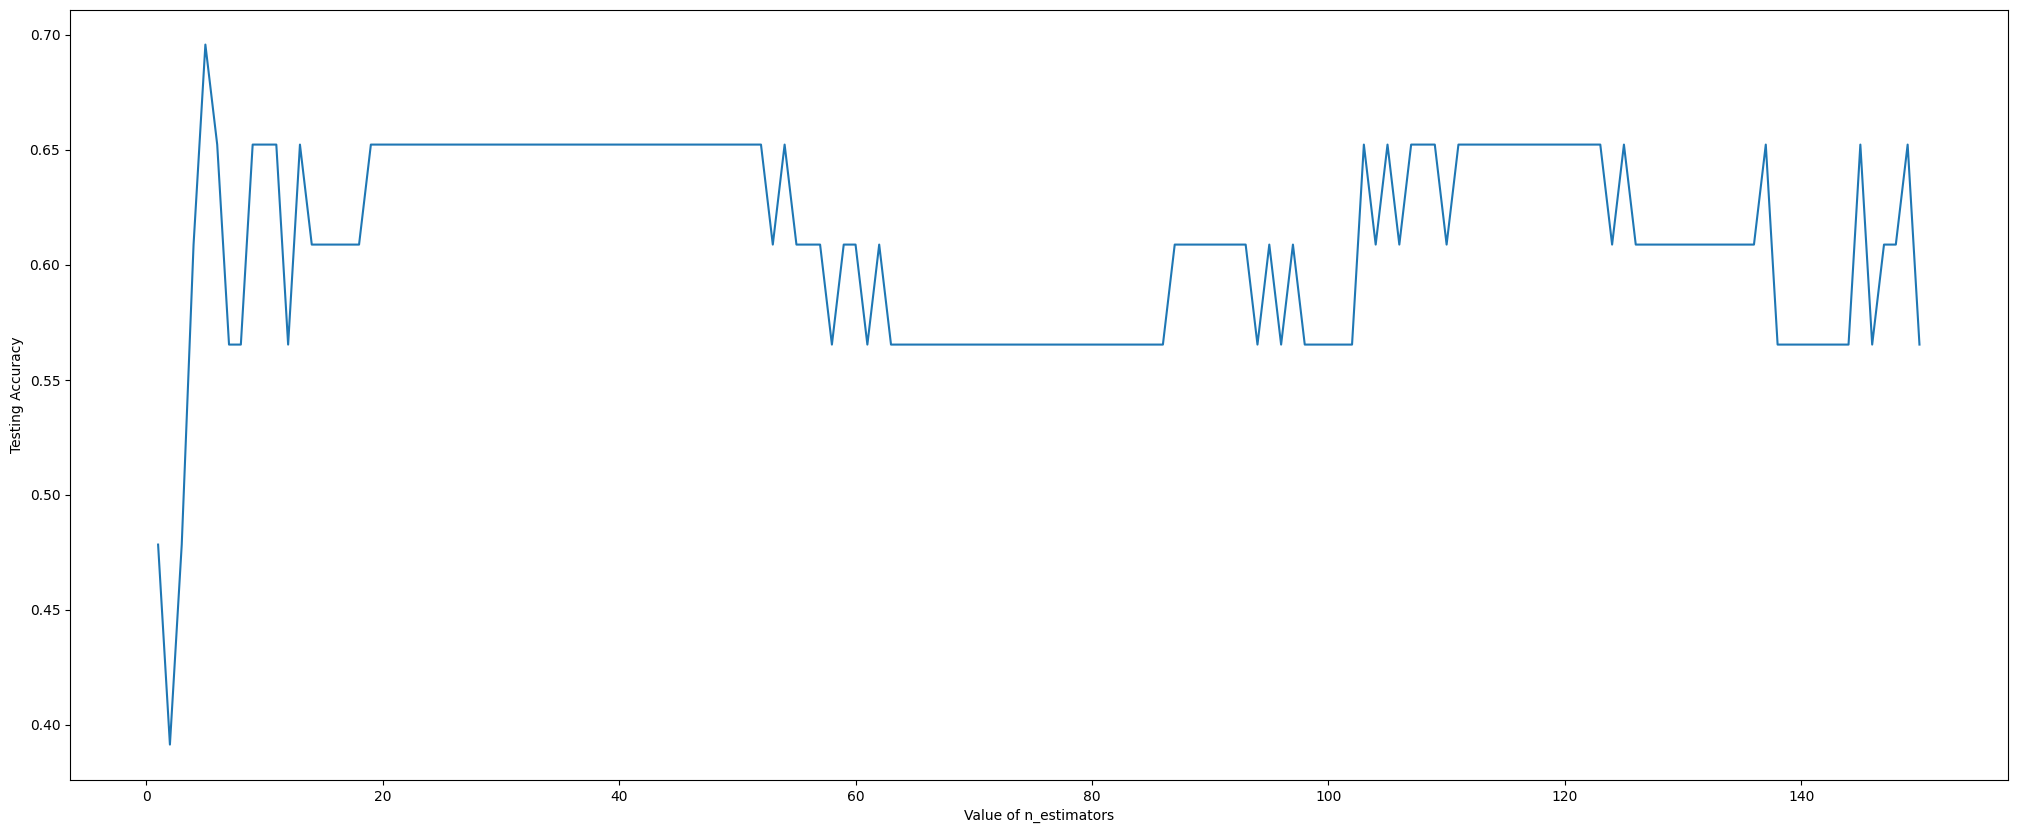

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.6521739130434783
2/150 round completed......................... Accurecy: 0.6521739130434783
3/150 round completed......................... Accurecy: 0.6086956521739131
4/150 round completed......................... Accurecy: 0.6086956521739131
5/150 round completed......................... Accurecy: 0.6521739130434783
6/150 round completed......................... Accurecy: 0.6086956521739131
7/150 round completed......................... Accurecy: 0.6086956521739131
8/150 round completed......................... Accurecy: 0.6086956521739131
9/150 round completed......................... Accurecy: 0.5652173913043478
10/150 round completed......................... Accurecy: 0.5652173913043478
11/150 round completed......................... Accurecy: 0.5652173913043478
12/150 round completed......................... Accurecy: 0.5652173913043478
13/150 round completed......................... Accurecy: 0.5652173913043478
14/150 r

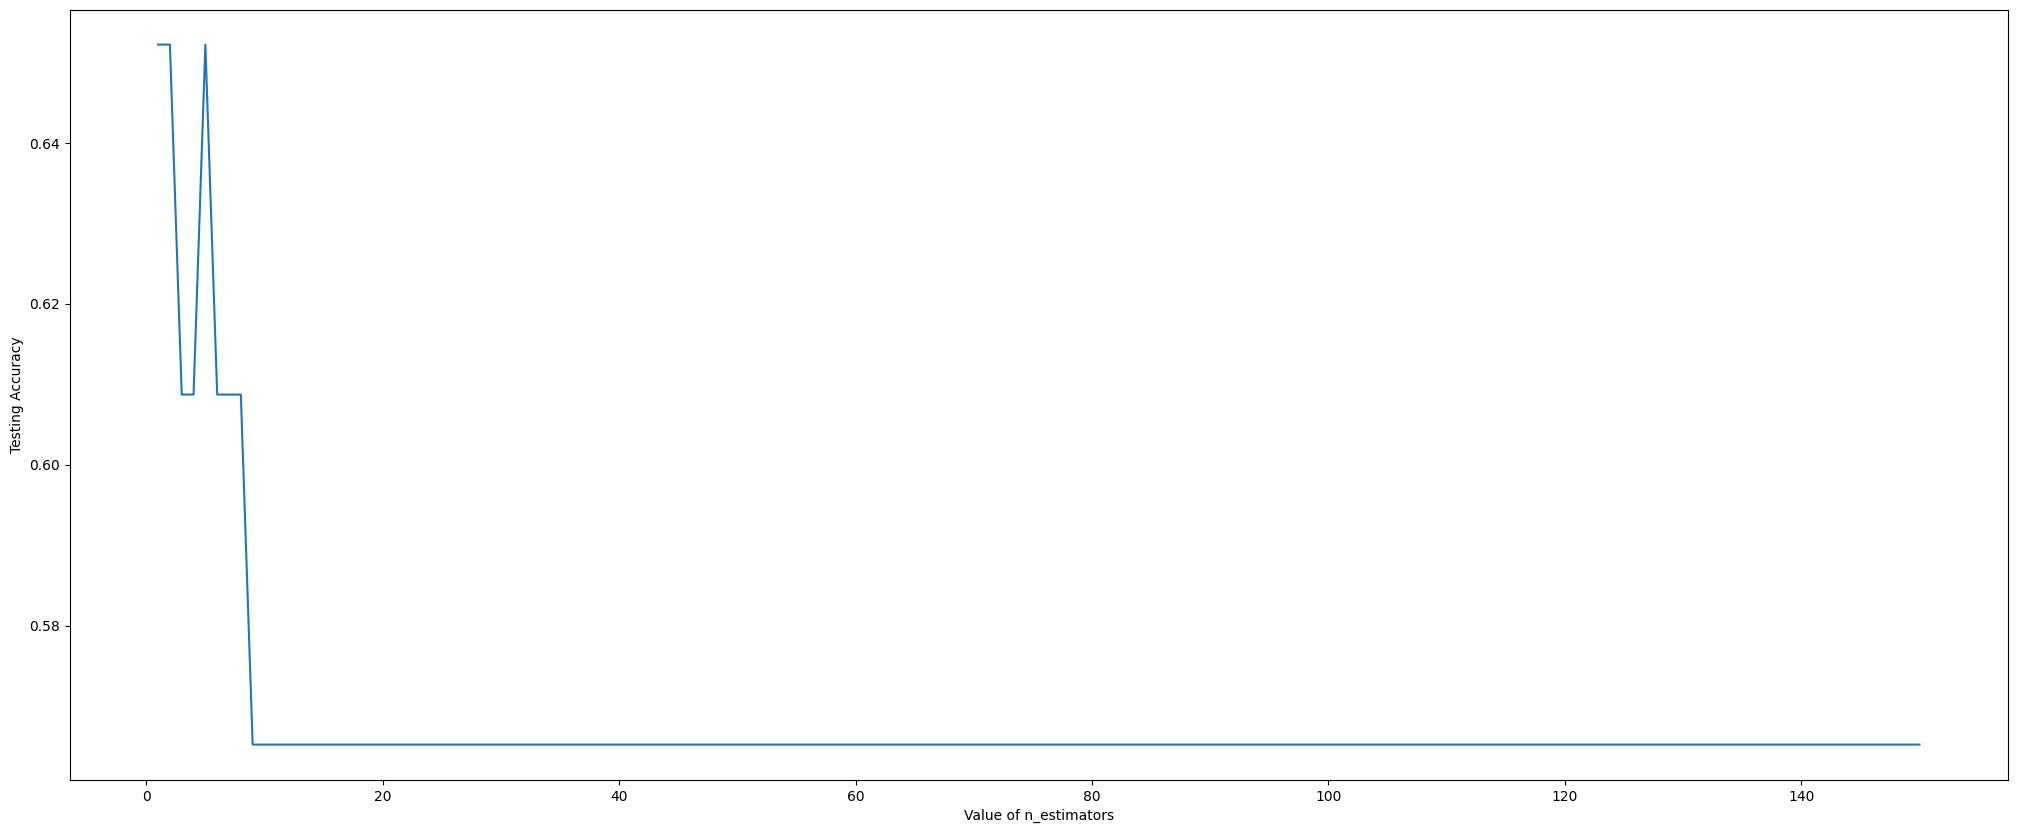

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[8 4]
 [3 8]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.67      0.73      0.70        11

    accuracy                           0.70        23
   macro avg       0.70      0.70      0.70        23
weighted avg       0.70      0.70      0.70        23

Accurecy:  0.6956521739130435


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[9 3]
 [5 6]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.67      0.55      0.60        11

    accuracy                           0.65        23
   macro avg       0.65      0.65      0.65        23
weighted avg       0.65      0.65      0.65        23

Accurecy:  0.6521739130434783


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[9 3]
 [5 6]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.67      0.55      0.60        11

    accuracy                           0.65        23
   macro avg       0.65      0.65      0.65        23
weighted avg       0.65      0.65      0.65        23

Accurecy:  0.6521739130434783




---



---



#XGB

In [31]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[9 3]
 [4 7]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.70      0.64      0.67        11

    accuracy                           0.70        23
   macro avg       0.70      0.69      0.69        23
weighted avg       0.70      0.70      0.69        23

Accurecy:  0.6956521739130435


1/250 round completed......................... Accurecy: 0.5652173913043478
2/250 round completed......................... Accurecy: 0.6521739130434783
3/250 round completed......................... Accurecy: 0.6521739130434783
4/250 round completed......................... Accurecy: 0.6521739130434783
5/250 round completed......................... Accurecy: 0.6086956521739131
6/250 round completed......................... Accurecy: 0.6086956521739131
7/250 round completed......................... Accurecy: 0.6086956521739131
8/250 round completed......................... Accurecy: 0.6086956521739131
9/250 round completed......................... Accurecy: 0.6086956521739131
10/250 round completed......................... Accurecy: 0.6086956521739131
11/250 round completed......................... Accurecy: 0.6086956521739131
12/250 round completed......................... Accurecy: 0.6086956521739131
13/250 round completed......................... Accurecy: 0.6086956521739131
14/250 r

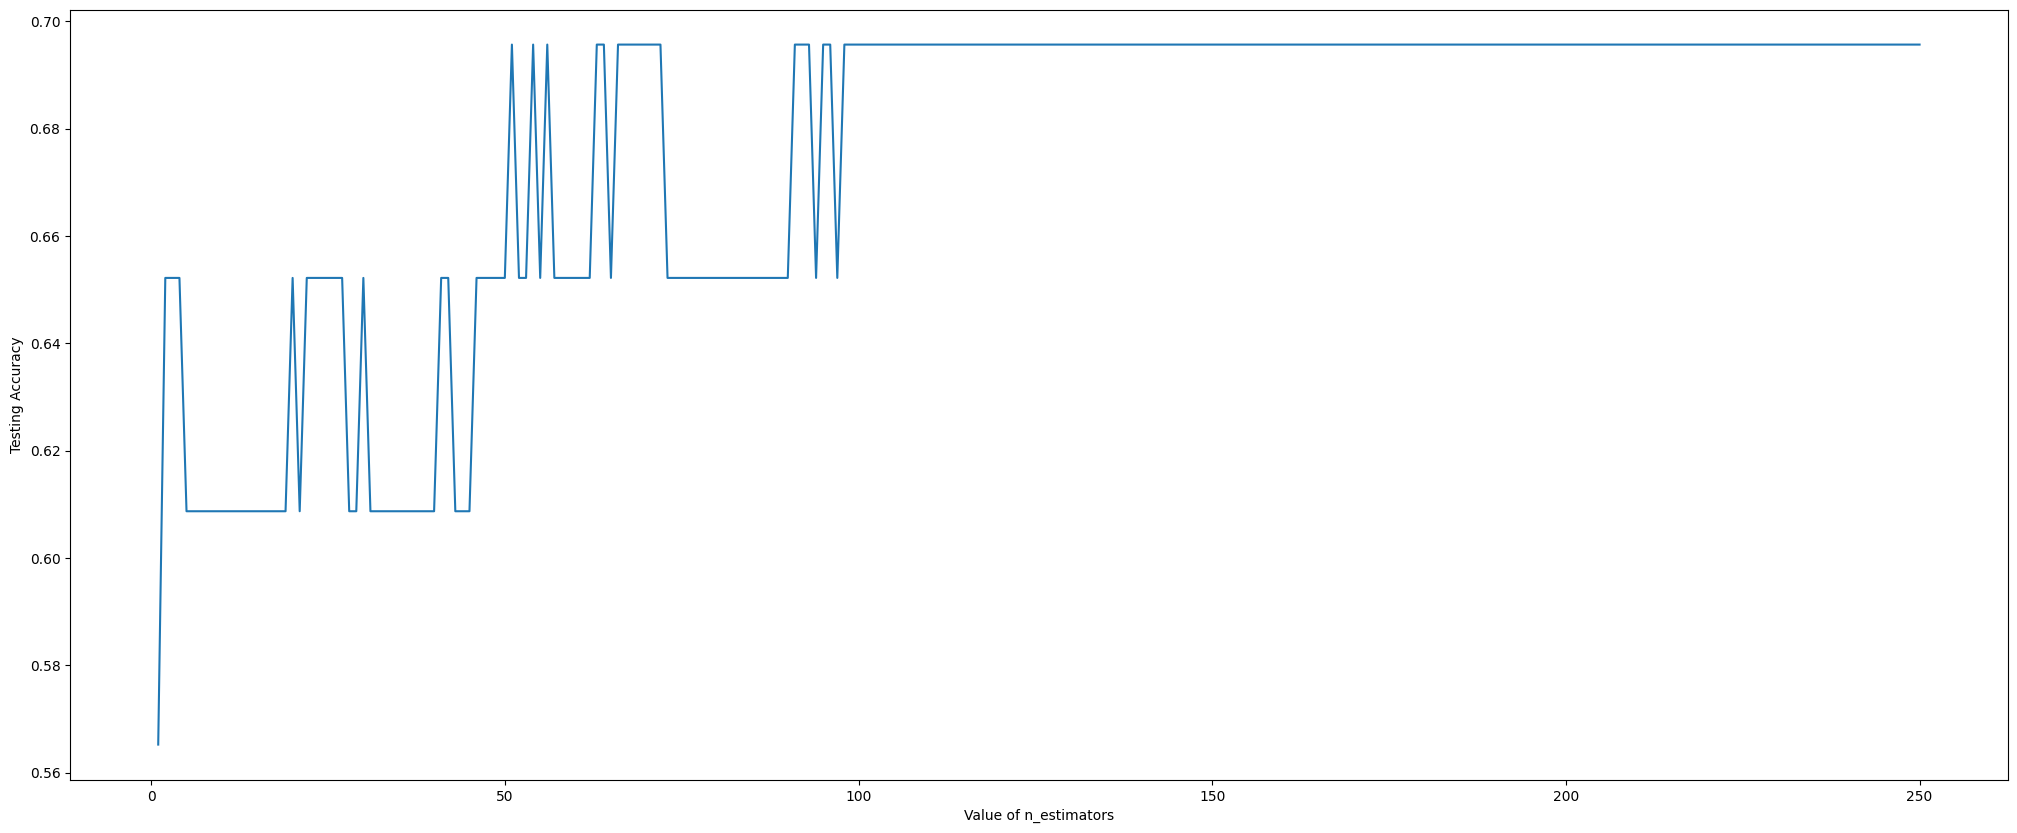

In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.6521739130434783
2/250 round completed......................... Accurecy: 0.6086956521739131
3/250 round completed......................... Accurecy: 0.7391304347826086
4/250 round completed......................... Accurecy: 0.7391304347826086
5/250 round completed......................... Accurecy: 0.6521739130434783
6/250 round completed......................... Accurecy: 0.6956521739130435
7/250 round completed......................... Accurecy: 0.6086956521739131
8/250 round completed......................... Accurecy: 0.6086956521739131
9/250 round completed......................... Accurecy: 0.6086956521739131
10/250 round completed......................... Accurecy: 0.6086956521739131
11/250 round completed......................... Accurecy: 0.6086956521739131
12/250 round completed......................... Accurecy: 0.6086956521739131
13/250 round completed......................... Accurecy: 0.6086956521739131
14/250 r

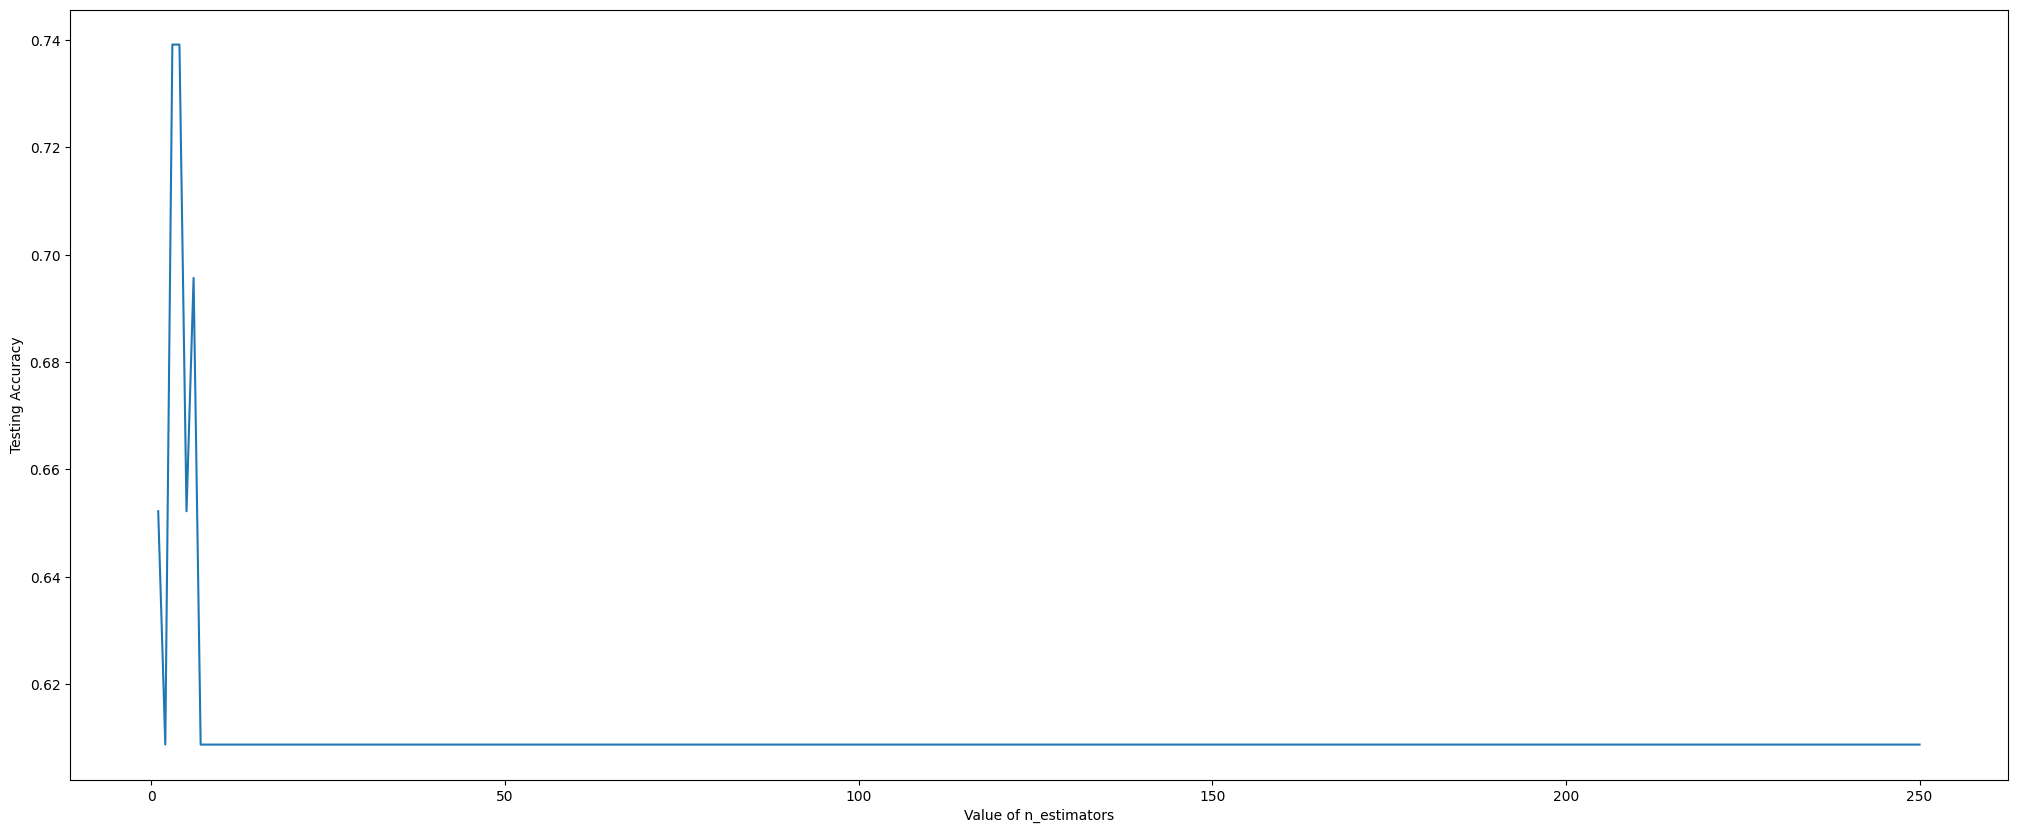

In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [34]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[9 3]
 [3 8]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.73      0.73      0.73        11

    accuracy                           0.74        23
   macro avg       0.74      0.74      0.74        23
weighted avg       0.74      0.74      0.74        23

Accurecy:  0.7391304347826086
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
  

In [35]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[9 3]
 [4 7]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.70      0.64      0.67        11

    accuracy                           0.70        23
   macro avg       0.70      0.69      0.69        23
weighted avg       0.70      0.70      0.69        23

Accurecy:  0.6956521739130435
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,

In [36]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[9 3]
 [4 7]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.70      0.64      0.67        11

    accuracy                           0.70        23
   macro avg       0.70      0.69      0.69        23
weighted avg       0.70      0.70      0.69        23

Accurecy:  0.6956521739130435


#KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[10  2]
 [ 4  7]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.78      0.64      0.70        11

    accuracy                           0.74        23
   macro avg       0.75      0.73      0.73        23
weighted avg       0.74      0.74      0.74        23

Accurecy:  0.7391304347826086


1/105 round completed......................... Accurecy: 0.5652173913043478
2/105 round completed......................... Accurecy: 0.8260869565217391
3/105 round completed......................... Accurecy: 0.782608695652174
4/105 round completed......................... Accurecy: 0.782608695652174
5/105 round completed......................... Accurecy: 0.7391304347826086
6/105 round completed......................... Accurecy: 0.782608695652174
7/105 round completed......................... Accurecy: 0.7391304347826086
8/105 round completed......................... Accurecy: 0.7391304347826086
9/105 round completed......................... Accurecy: 0.6521739130434783
10/105 round completed......................... Accurecy: 0.6521739130434783
11/105 round completed......................... Accurecy: 0.6521739130434783
12/105 round completed......................... Accurecy: 0.6956521739130435
13/105 round completed......................... Accurecy: 0.5652173913043478
14/105 roun

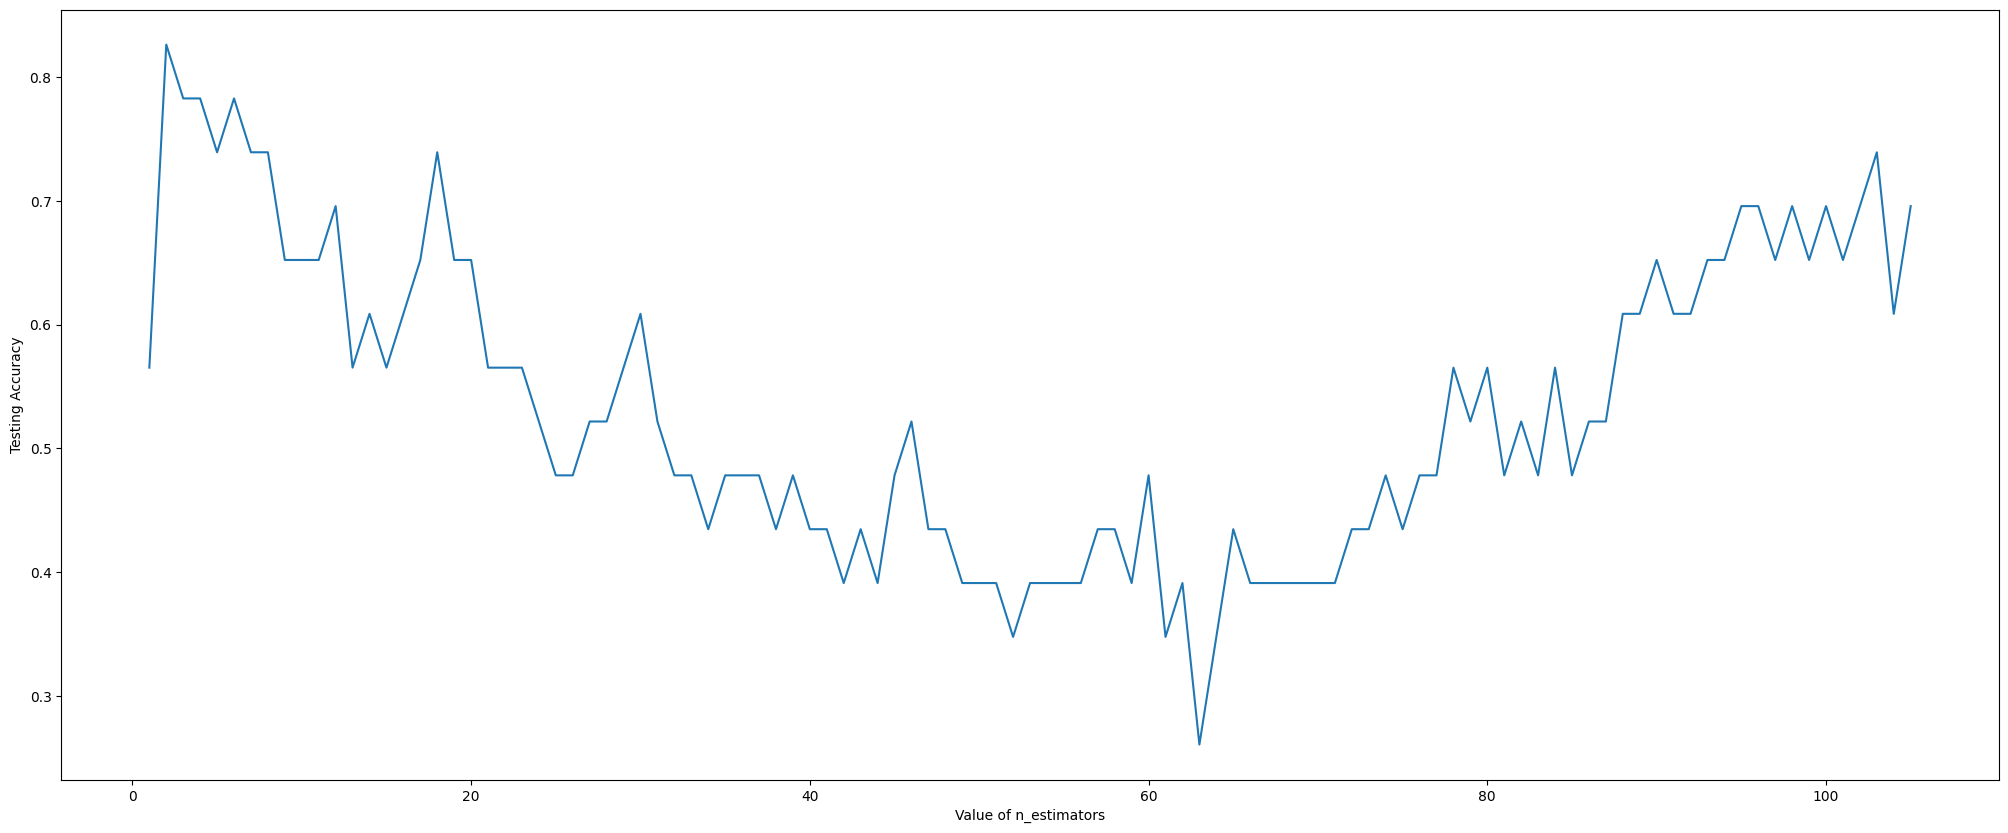

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[11  1]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.89      0.73      0.80        11

    accuracy                           0.83        23
   macro avg       0.84      0.82      0.82        23
weighted avg       0.84      0.83      0.82        23

Accurecy:  0.8260869565217391


#NB

In [40]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[11  1]
 [ 6  5]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.83      0.45      0.59        11

    accuracy                           0.70        23
   macro avg       0.74      0.69      0.67        23
weighted avg       0.74      0.70      0.68        23

Accurecy:  0.6956521739130435


#Histogram-Based Gradient Boosting

In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier

hisgradBoost_default = HistGradientBoostingClassifier(random_state=0)
hisgradBoost_default.fit(X_train, y_train)
y_pred = hisgradBoost_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_default,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)


[[9 3]
 [3 8]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.73      0.73      0.73        11

    accuracy                           0.74        23
   macro avg       0.74      0.74      0.74        23
weighted avg       0.74      0.74      0.74        23

Accurecy:  0.7391304347826086


100/1000 round completed......................... Accurecy: 0.7391304347826086
200/1000 round completed......................... Accurecy: 0.7391304347826086
300/1000 round completed......................... Accurecy: 0.7391304347826086
400/1000 round completed......................... Accurecy: 0.7391304347826086
500/1000 round completed......................... Accurecy: 0.7391304347826086
600/1000 round completed......................... Accurecy: 0.7391304347826086
700/1000 round completed......................... Accurecy: 0.7391304347826086
800/1000 round completed......................... Accurecy: 0.7391304347826086
900/1000 round completed......................... Accurecy: 0.7391304347826086
1000/1000 round completed......................... Accurecy: 0.7391304347826086
The best max_iter:
100


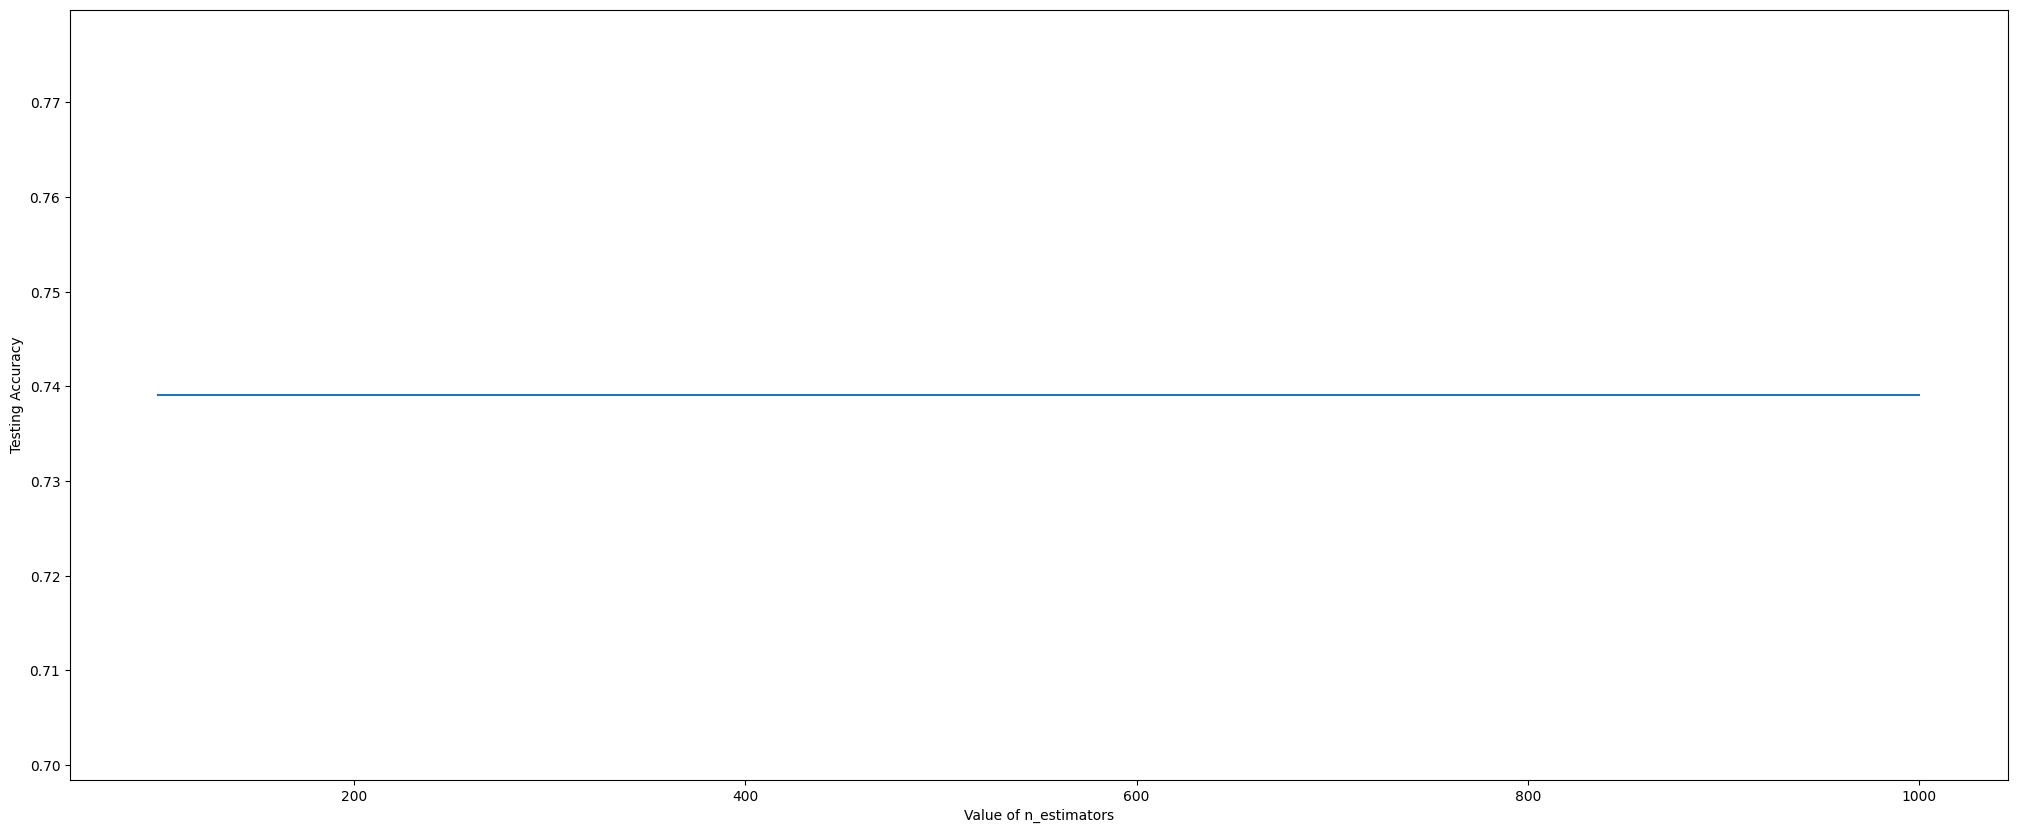

In [42]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=1000
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/50 round completed......................... Accurecy: 0.6521739130434783
2/50 round completed......................... Accurecy: 0.7391304347826086
3/50 round completed......................... Accurecy: 0.7391304347826086
4/50 round completed......................... Accurecy: 0.782608695652174
5/50 round completed......................... Accurecy: 0.7391304347826086
6/50 round completed......................... Accurecy: 0.7391304347826086
7/50 round completed......................... Accurecy: 0.7391304347826086
8/50 round completed......................... Accurecy: 0.7391304347826086
9/50 round completed......................... Accurecy: 0.7391304347826086
10/50 round completed......................... Accurecy: 0.7391304347826086
11/50 round completed......................... Accurecy: 0.7391304347826086
12/50 round completed......................... Accurecy: 0.7391304347826086
13/50 round completed......................... Accurecy: 0.7391304347826086
14/50 round completed.

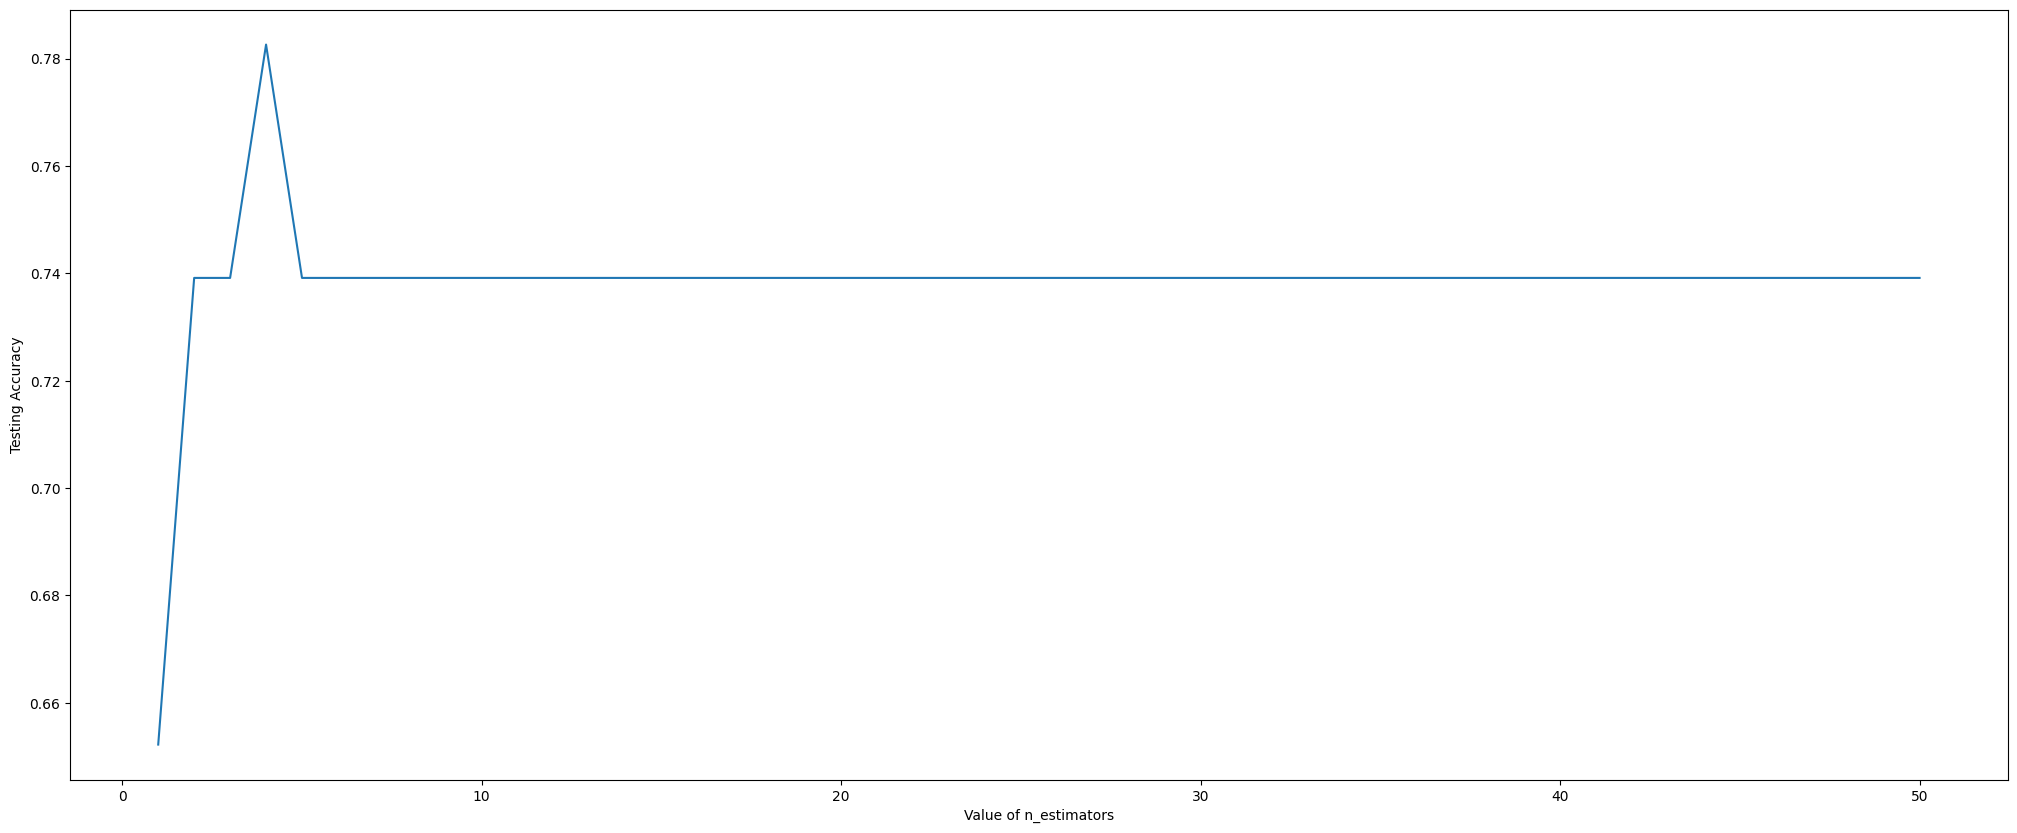

In [43]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_depth:")
max_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(max_depth)

In [44]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_iter = HistGradientBoostingClassifier(max_iter=best_estimator,random_state=0)
hisgradBoost_max_iter.fit(X_train, y_train)
y_pred = hisgradBoost_max_iter.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_iter,8,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[9 3]
 [3 8]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.73      0.73      0.73        11

    accuracy                           0.74        23
   macro avg       0.74      0.74      0.74        23
weighted avg       0.74      0.74      0.74        23

Accurecy:  0.7391304347826086


In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_depth = HistGradientBoostingClassifier(max_depth=max_depth,random_state=0)
hisgradBoost_max_depth.fit(X_train, y_train)
y_pred = hisgradBoost_max_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_depth,9,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[9 3]
 [2 9]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.75      0.82      0.78        11

    accuracy                           0.78        23
   macro avg       0.78      0.78      0.78        23
weighted avg       0.79      0.78      0.78        23

Accurecy:  0.782608695652174


In [46]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=max_depth,random_state=0)
hisgradBoost_all.fit(X_train, y_train)
y_pred = hisgradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_all,10,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[9 3]
 [2 9]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.75      0.82      0.78        11

    accuracy                           0.78        23
   macro avg       0.78      0.78      0.78        23
weighted avg       0.79      0.78      0.78        23

Accurecy:  0.782608695652174


#Result

In [47]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()

AdaBoostClassifier(random_state=0) 1  :  0.5652173913043478
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=1, random_state=0) 1  :  0.6956521739130435
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.6086956521739131
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=2, random_state=0) 2  :  0.6086956521739131
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=2, random_state=0) 2  :  0.6521739130434783
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=2, n_estimators=2, random_state=0) 2  :  0.6086956521739131
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.5652173913043478
---------------------------------------------------------------

RandomForestCla

In [50]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(KNeighborsClassifier(n_neighbors=2), 5, 'KNeighborsClassifier')   :  0.8260869565217391
-------------------------------------------------------------------------------------------------
(HistGradientBoostingClassifier(max_depth=4, random_state=0), 9, 'HistGradientBoostingClassifier')   :  0.782608695652174
-------------------------------------------------------------------------------------------------
(HistGradientBoostingClassifier(max_depth=4, random_state=0), 10, 'HistGradientBoostingClassifier')   :  0.782608695652174
-------------------------------------------------------------------------------------------------
(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_c

In [51]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(KNeighborsClassifier(n_neighbors=2), 'KNeighborsClassifier')
(HistGradientBoostingClassifier(max_depth=4, random_state=0), 'HistGradientBoostingClassifier')
(HistGradientBoostingClassifier(max_depth=4, random_state=0), 'HistGradientBoostingClassifier')
(XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_

In [52]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [53]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------
KNeighborsClassifier(n_neighbors=2)
[[11  1]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.89      0.73      0.80        11

    accuracy                           0.83        23
   macro avg       0.84      0.82      0.82        23
weighted avg       0.84      0.83      0.82        23

Accurecy:  0.8260869565217391
--------------------------------------------------
HistGradientBoostingClassifier(max_depth=4, random_state=0)
[[9 3]
 [2 9]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.75      0.82      0.78        11

    accuracy                           0.78        23
   macro avg       0.78      0.78      0.78        23
weighted avg       0.79      0.78      0.78        23

Accurecy:  0.782608695652174
--------------------------------------------------
Hist

#SHAP

In [54]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 23.2 MB/s eta 0:00:00


In [59]:

def SHAP_EXP(model,graph_feat,list_of_feat1):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_train)

  shap_values1 = explainer(X_train)
  features_names=list_of_feat1

  if 'Subjects' in features_names:
    features_names.pop(0)

  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=30)

  print("Global Explaination")

  shap.summary_plot(shap_values1,max_display=30)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=25)


  print("Local Explaination")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=25)

**Model Check Box Function**

In [56]:

def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [57]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=2, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=5, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

In [ ]:
graph_feat={
    "max_display":30,
    "shap_values Index":10
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat,list_of_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=2, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=5, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names


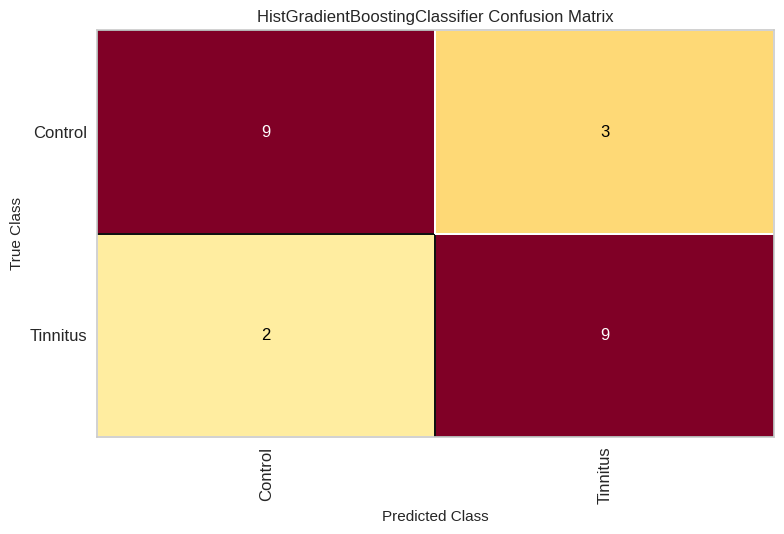

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=2, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=5, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

In [ ]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Tinnitus'
  return my_list

In [ ]:
new_keys_4=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=2, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=5, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

In [ ]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

#ROC Comparaing Machine Learning Models

In [ ]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title('ROC Plot Testing',fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [ ]:
new_keys_2=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=2, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=5, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)


Change  the given dictionary of graph feature for desire graph.

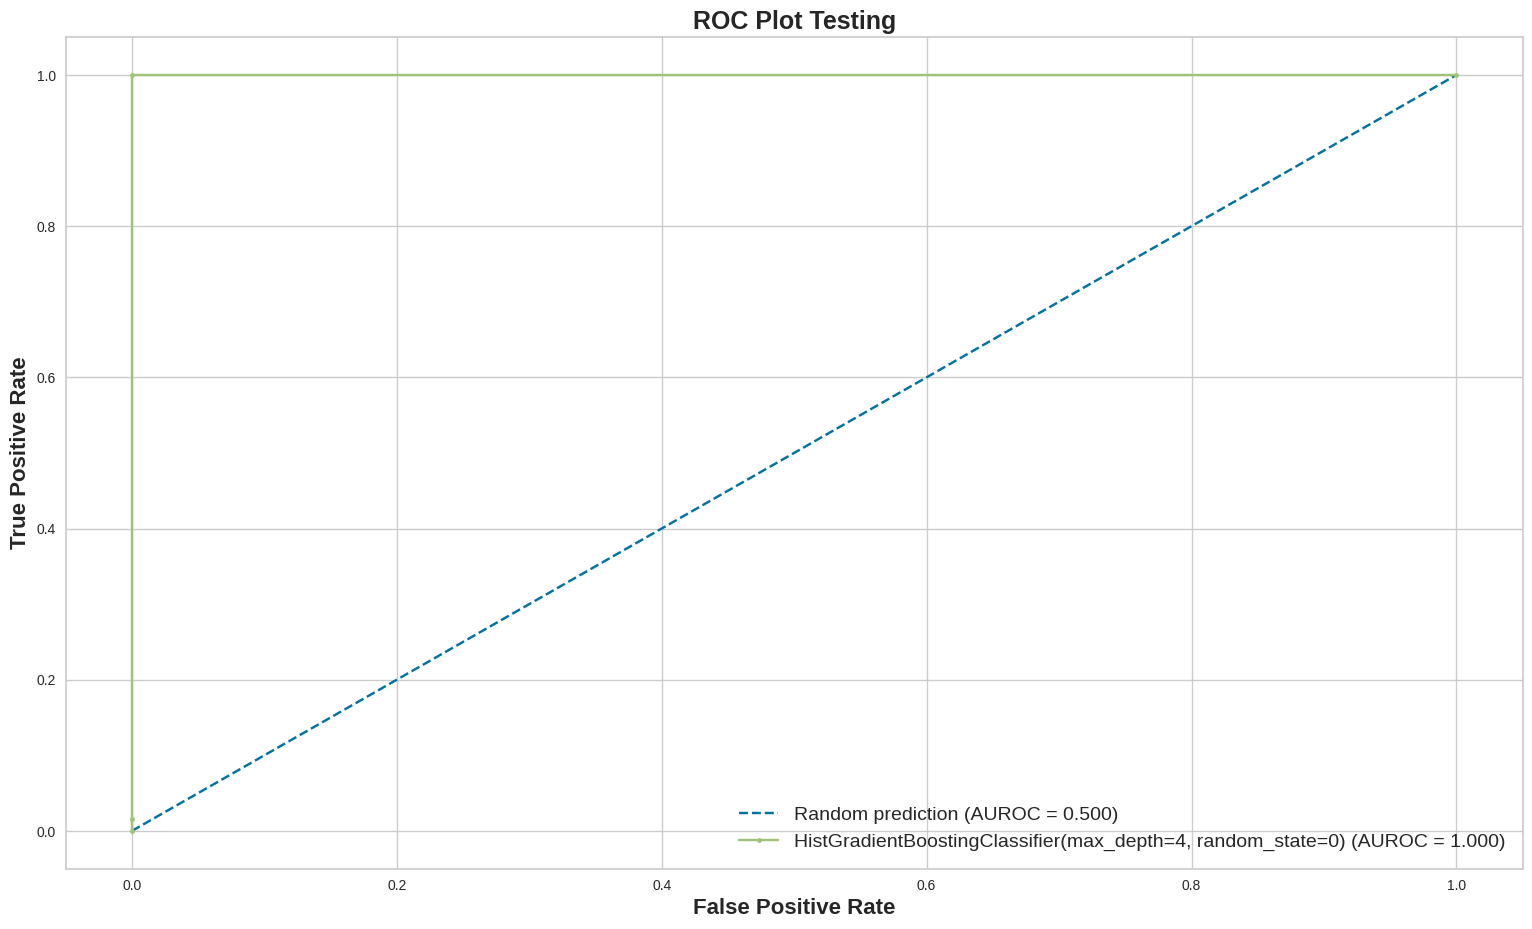

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_training.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_train,y_train,graph_feat)



---



***Testing ROC***<br>
Chosse the Models

In [ ]:
new_keys_3=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=2, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=5, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)


Change  the given dictionary of graph feature for desire graph.

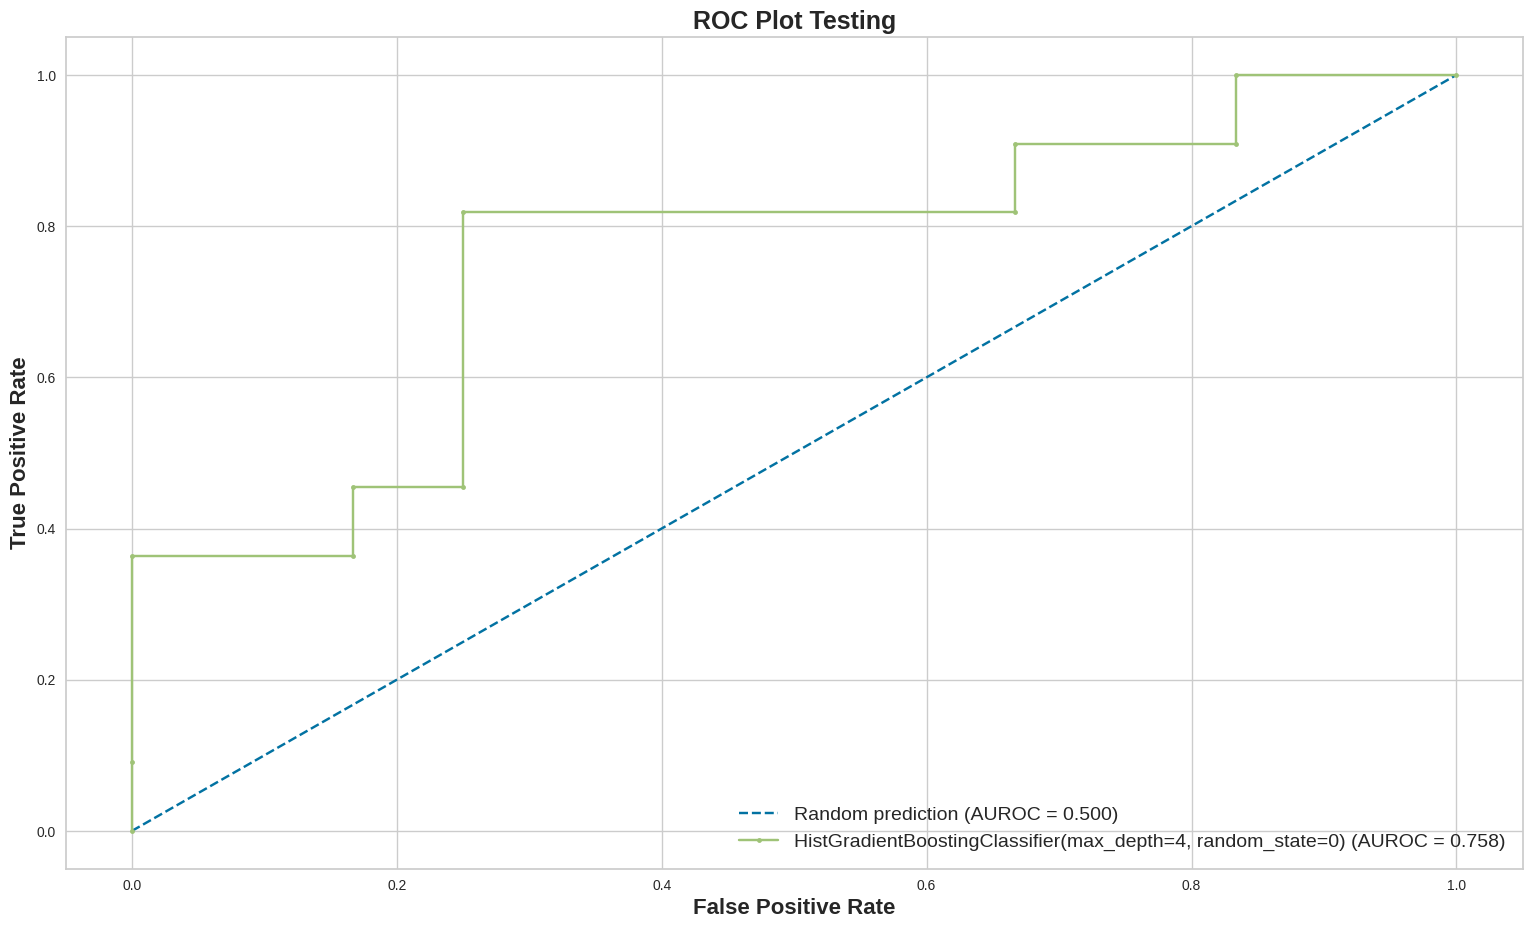

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=10
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.5652173913043478
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6470833333333333 (For 10 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=1, random_state=0)  -> Accuracy:  0.6956521739130435
AdaBoostClassifier(n_estimators=1, random_state=0)  -> AVG Accurecy After CV: 0.6849999999999999 (For 10 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.6086956521739131
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6970833333333333 (For 10 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=2, random_state=0)  -> Accuracy:  0.6086956521739131
GradientBoostingClassifier(n_estimators=2, random_state=0)  -> AVG Accurecy After CV: 0.6283333333333333 (For 10 Fold)
-----------------------

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=1, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=2, random_state=0)', i…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=5, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=1, n_estimators=5, random_state=0)', inden…

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='XGBClassifier(base_score=None, booster=None, callbacks=None,\n             …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=2)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

Checkbox(value=False, description='HistGradientBoostingClassifier(max_depth=4, random_state=0)', indent=False)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

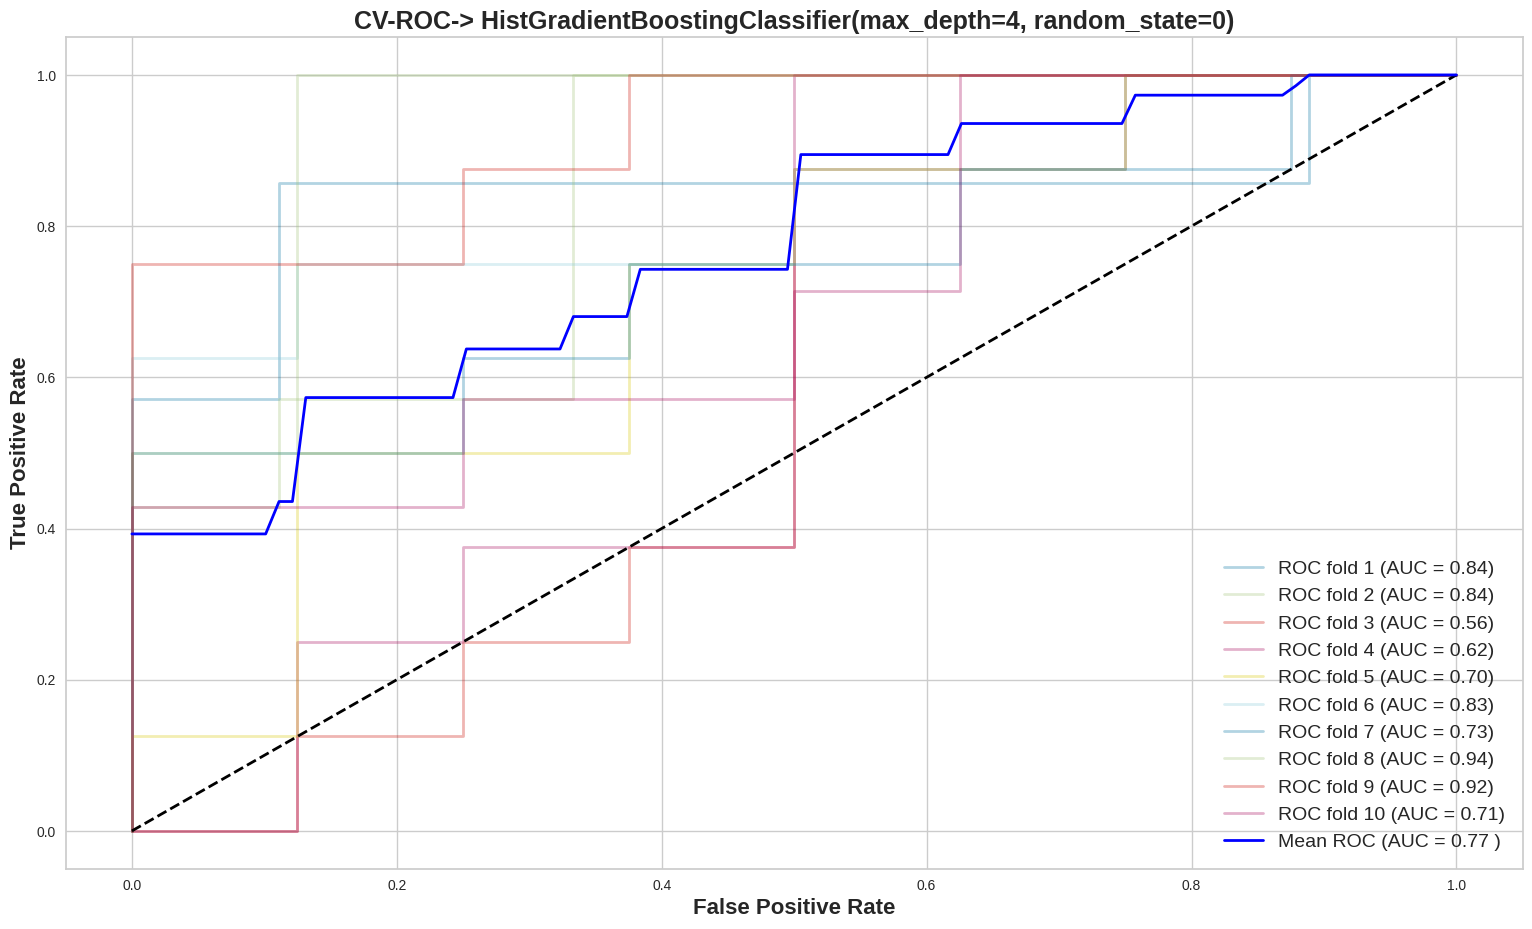

-----------------------------------------------------------------
-----------------------------------------------------------------


In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=10

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],10,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

#ANN Classification